# Feature Engineering

## Categorical-to-Numerical conversion
Before we look at the modeling, we need to learn about ways to represent categorical data as numerical data.

Most of the scikit-learn models require numerical inputs, but we have a number of ways to convert data.

### One-Hot Encoding Introduction
One method of changing categorical values into numerical values (appropriate for when there is no inherent order to the categories) is called "one-hot" encoding. This takes a single column of categorical data with k categories and transforms it into k columns of binary 0/1 data, one column for each of the unique category values that existed in the column. Each row will have a $1$ in the column corresponding to its original categorical value, and a $0$ in all the other columns.

Pandas comes with an easy, built-in method for carrying out this one-hot encoding process: `pd.get_dummies()`. It takes as input a Series (or DataFrame), and outputs a DataFrame with the categorical columns converted into sets of one-hot-encoded columns. (Any numerical columns are left unchanged.)

Scikit-learn implements this slightly differently than pandas, via the `OneHotEncoder` as we shall see shortly.

### Label Encoding Introduction
The other major type of categorical-to-numerical encoding is called Label Encoding. This is suitable for when the categories have some inherent ordering to them, (i.e. the data is ordinal, not nominal). We can exploit this ordinality to make smarter encodings.

In [56]:
# import the one-hot encoder from scikit-learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [57]:
# Create a functions that can count the number of classes in a categorical variable.
def classes_count(df):
    """
    This function counts the number of classes in each categorical column
    :param df: dataframe you want to count the classes in
    :return: categorical columns with number of classes
    """
    cat_cols_classes= {}
    cnt = 0
    for column in df.select_dtypes(include='object').columns:
        cat_cols_classes[column] = df[column].unique()
        cnt += 1
        print(column+' has '+str(len(cat_cols_classes[column]))+' classes')
    print(f'{cnt} categorical columns found')
    return cat_cols_classes




In [58]:
# Create a function that can convert categorical columns to numerical columns using one-hot encoder.
def onehot_encode(df,onehot_cols = None):
    """
    This function converts categorical columns to numerical columns using one-hot encoding
    :param df: dataframe you want to convert
    :param onehot_cols: list of categorical columns you want to convert to numerical columns
    :return:    dataframe with one-hot encoded columns
    """
    # Initialize the one-hot encoder
    enc = OneHotEncoder(handle_unknown='ignore',drop='first')
    if onehot_cols is None:
        onehot_cols = df.select_dtypes(include='object').columns
    print('This dataframe has '+str(len(df.select_dtypes(include='object').columns))+' categorical columns')
    print('We weill one-hot encode the '+str(len(onehot_cols))+' categorical columns')
    # Apply one-hot encoding to each column with categorical data
    for col in onehot_cols:
        print(f'Encoding column {col} which has {df[col].nunique()} unique classes')
        sub = pd.DataFrame(df[col])
        encoded = enc.fit_transform(sub)
        encoded_df = pd.DataFrame(encoded.toarray(), columns=enc.categories_[0][1:], dtype=int)
        # Rename the columns using the original column names
        encoded_df = encoded_df.add_prefix(col + '_')
        # Remove the old column
        df.drop(columns=col, inplace=True)
        # Concatenate the new columns to the dataframe
        df = pd.concat([df, encoded_df], axis=1)
    return df



In [59]:
# Create a function that can convert numerical columns to categorical columns using label encoder.
def labelencoder (df,label_cols):
    """
    This function converts numerical columns to categorical columns using label encoding
    :param df:  dataframe you want to convert
    :param label_cols:  list of numerical columns you want to convert to categorical columns using label encoding
    :return:    dataframe with label encoded columns
    """

    print('This dataframe has '+str(len(df.select_dtypes(include='object').columns))+' categorical columns')
    print('We weill label encode the '+str(len(label_cols))+' categorical columns')
    # Initialize the label encoder
    enc = LabelEncoder()
    # Loop through each column and apply label encoding
    for col in label_cols:
        print(f'Encoding column {col} which has {df[col].nunique()} unique classes')
        sub = df[col].ravel()
        # Fit the label encoder to the data
        encoded = enc.fit(mapping[col])
        encoded_df = pd.DataFrame(encoded.transform(sub))
        # Rename the columns using the original column names
        encoded_df = encoded_df.add_prefix(col + '_')
        #Concatenate the new columns to the dataframe
        df = pd.concat([df, encoded_df], axis=1)
        #Remove the old column
        df.drop(columns=col, inplace=True)

    return df

### Application categorical columns conversion to numerical columns

In [60]:
# Check the number of classes in each categorical column
classes_count(application_train)

NAME_CONTRACT_TYPE has 2 classes
CODE_GENDER has 3 classes
FLAG_OWN_CAR has 2 classes
FLAG_OWN_REALTY has 2 classes
NAME_TYPE_SUITE has 7 classes
NAME_INCOME_TYPE has 8 classes
NAME_EDUCATION_TYPE has 5 classes
NAME_FAMILY_STATUS has 6 classes
NAME_HOUSING_TYPE has 6 classes
OCCUPATION_TYPE has 18 classes
WEEKDAY_APPR_PROCESS_START has 7 classes
ORGANIZATION_TYPE has 58 classes
FONDKAPREMONT_MODE has 4 classes
HOUSETYPE_MODE has 3 classes
WALLSMATERIAL_MODE has 7 classes
EMERGENCYSTATE_MODE has 2 classes
16 categorical columns found


{'NAME_CONTRACT_TYPE': array(['Cash loans', 'Revolving loans'], dtype=object),
 'CODE_GENDER': array(['M', 'F', 'XNA'], dtype=object),
 'FLAG_OWN_CAR': array(['N', 'Y'], dtype=object),
 'FLAG_OWN_REALTY': array(['Y', 'N'], dtype=object),
 'NAME_TYPE_SUITE': array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
        'Other_A', 'Other_B', 'Group of people'], dtype=object),
 'NAME_INCOME_TYPE': array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
        'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
       dtype=object),
 'NAME_EDUCATION_TYPE': array(['Secondary / secondary special', 'Higher education',
        'Incomplete higher', 'Lower secondary', 'Academic degree'],
       dtype=object),
 'NAME_FAMILY_STATUS': array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
        'Separated', 'Unknown'], dtype=object),
 'NAME_HOUSING_TYPE': array(['House / apartment', 'Rented apartment', 'With parents',
        'Municipal apartment'

We found that the columns of `WEEKDAY_APPR_START` and `NAME_EDUCATION_TYPE` have internal orders between classes.

In [61]:
# Convert categorical columns to numerical columns using one-hot encoding
application_label_encode_col = ['WEEKDAY_APPR_PROCESS_START','NAME_EDUCATION_TYPE']

#### One-Hot Encoding

In [64]:
# Convert categorical columns to numerical columns using one-hot encoding
application_one_hot_cols = application_train.select_dtypes(include='object').columns.difference(application_label_encode_col)
application_one_hot_cols

Index(['CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE',
       'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [65]:
# Convert categorical columns to numerical columns using one-hot encoding
application_train_encoded = onehot_encode(application_train,application_one_hot_cols)

This dataframe has 16 categorical columns
We weill one-hot encode the 14 categorical columns
Encoding column CODE_GENDER which has 3 unique classes
Encoding column EMERGENCYSTATE_MODE which has 2 unique classes
Encoding column FLAG_OWN_CAR which has 2 unique classes
Encoding column FLAG_OWN_REALTY which has 2 unique classes
Encoding column FONDKAPREMONT_MODE which has 4 unique classes
Encoding column HOUSETYPE_MODE which has 3 unique classes
Encoding column NAME_CONTRACT_TYPE which has 2 unique classes
Encoding column NAME_FAMILY_STATUS which has 6 unique classes
Encoding column NAME_HOUSING_TYPE which has 6 unique classes
Encoding column NAME_INCOME_TYPE which has 8 unique classes
Encoding column NAME_TYPE_SUITE which has 7 unique classes
Encoding column OCCUPATION_TYPE which has 18 unique classes
Encoding column ORGANIZATION_TYPE which has 58 unique classes
Encoding column WALLSMATERIAL_MODE which has 7 unique classes


#### Label Encoding

In [67]:
# Convert categorical columns to numerical columns using label encoding
application_train_lencoded = labelencoder(application_train_encoded,application_label_encode_col)

This dataframe has 2 categorical columns
We weill label encode the 2 categorical columns
Encoding column WEEKDAY_APPR_PROCESS_START which has 7 unique classes
Encoding column NAME_EDUCATION_TYPE which has 5 unique classes


### Previous application categorical columns conversion to numerical columns

#### One-Hot Encoding

In [68]:
# Check the number of classes in each categorical column
classes_count(previous_application_application)

NAME_CONTRACT_TYPE_x has 4 classes
WEEKDAY_APPR_PROCESS_START_x has 7 classes
FLAG_LAST_APPL_PER_CONTRACT has 2 classes
NAME_CASH_LOAN_PURPOSE has 25 classes
NAME_CONTRACT_STATUS has 4 classes
NAME_PAYMENT_TYPE has 4 classes
CODE_REJECT_REASON has 9 classes
NAME_TYPE_SUITE_x has 7 classes
NAME_CLIENT_TYPE has 4 classes
NAME_GOODS_CATEGORY has 27 classes
NAME_PORTFOLIO has 5 classes
NAME_PRODUCT_TYPE has 3 classes
CHANNEL_TYPE has 8 classes
NAME_SELLER_INDUSTRY has 11 classes
NAME_YIELD_GROUP has 5 classes
PRODUCT_COMBINATION has 17 classes
NAME_CONTRACT_TYPE_y has 2 classes
CODE_GENDER has 3 classes
FLAG_OWN_CAR has 2 classes
FLAG_OWN_REALTY has 2 classes
NAME_TYPE_SUITE_y has 7 classes
NAME_INCOME_TYPE has 7 classes
NAME_EDUCATION_TYPE has 5 classes
NAME_FAMILY_STATUS has 5 classes
NAME_HOUSING_TYPE has 6 classes
OCCUPATION_TYPE has 18 classes
WEEKDAY_APPR_PROCESS_START_y has 7 classes
ORGANIZATION_TYPE has 58 classes
FONDKAPREMONT_MODE has 4 classes
HOUSETYPE_MODE has 3 classes
WALLS

{'NAME_CONTRACT_TYPE_x': array(['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA'],
       dtype=object),
 'WEEKDAY_APPR_PROCESS_START_x': array(['SATURDAY', 'SUNDAY', 'THURSDAY', 'WEDNESDAY', 'TUESDAY', 'FRIDAY',
        'MONDAY'], dtype=object),
 'FLAG_LAST_APPL_PER_CONTRACT': array(['Y', 'N'], dtype=object),
 'NAME_CASH_LOAN_PURPOSE': array(['XAP', 'XNA', 'Other', 'Buying a holiday home / land', 'Repairs',
        'Everyday expenses', 'Payments on other loans', 'Urgent needs',
        'Refusal to name the goal', 'Journey', 'Furniture',
        'Buying a garage', 'Building a house or an annex', 'Education',
        'Wedding / gift / holiday', 'Buying a home', 'Medicine',
        'Purchase of electronic equipment', 'Buying a used car',
        'Buying a new car', 'Car repairs', 'Business development', 'Hobby',
        'Gasification / water supply', 'Money for a third person'],
       dtype=object),
 'NAME_CONTRACT_STATUS': array(['Approved', 'Refused', 'Canceled', 'Unused offer

All categorical columns can be converted to numerical columns using one-hot encoding.

In [69]:
previous_application_encoded = onehot_encode(previous_application)

This dataframe has 16 categorical columns
We weill one-hot encode the 16 categorical columns
Encoding column NAME_CONTRACT_TYPE which has 4 unique classes
Encoding column WEEKDAY_APPR_PROCESS_START which has 7 unique classes
Encoding column FLAG_LAST_APPL_PER_CONTRACT which has 2 unique classes
Encoding column NAME_CASH_LOAN_PURPOSE which has 25 unique classes
Encoding column NAME_CONTRACT_STATUS which has 4 unique classes
Encoding column NAME_PAYMENT_TYPE which has 4 unique classes
Encoding column CODE_REJECT_REASON which has 9 unique classes
Encoding column NAME_TYPE_SUITE which has 7 unique classes
Encoding column NAME_CLIENT_TYPE which has 4 unique classes
Encoding column NAME_GOODS_CATEGORY which has 28 unique classes
Encoding column NAME_PORTFOLIO which has 5 unique classes
Encoding column NAME_PRODUCT_TYPE which has 3 unique classes
Encoding column CHANNEL_TYPE which has 8 unique classes
Encoding column NAME_SELLER_INDUSTRY which has 11 unique classes
Encoding column NAME_YIELD_

### Bureau categorical columns conversion to numerical columns

#### One-Hot Encoding

In [71]:
# Check the number of classes in each categorical column
classes_count(bureau)

CREDIT_ACTIVE has 4 classes
CREDIT_CURRENCY has 4 classes
CREDIT_TYPE has 15 classes
3 categorical columns found


{'CREDIT_ACTIVE': array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object),
 'CREDIT_CURRENCY': array(['currency 1', 'currency 2', 'currency 4', 'currency 3'],
       dtype=object),
 'CREDIT_TYPE': array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
        'Microloan', 'Loan for working capital replenishment',
        'Loan for business development', 'Real estate loan',
        'Unknown type of loan', 'Another type of loan',
        'Cash loan (non-earmarked)', 'Loan for the purchase of equipment',
        'Mobile operator loan', 'Interbank credit',
        'Loan for purchase of shares (margin lending)'], dtype=object)}

All categorical columns can be converted to numerical columns using one-hot encoding.

In [72]:
bureau_encoded = onehot_encode(bureau)

This dataframe has 3 categorical columns
We weill one-hot encode the 3 categorical columns
Encoding column CREDIT_ACTIVE which has 4 unique classes
Encoding column CREDIT_CURRENCY which has 4 unique classes
Encoding column CREDIT_TYPE which has 15 unique classes


## Creating New Features
Feature engineering refers to a geneal process and can involve both feature construction: adding new features from the existing data, and feature selection: choosing only the most important features or other methods of dimensionality reduction. There are many techniques we can use to both create features and select features.
We will do a lot of feature engineering when we start using the other data sources, but in this notebook we will try only two simple feature construction methods:
- Polynomial features
- Domain knowledge features

### Polynomial features

One simple feature construction method is called polynomial features. In this method, we make features that are powers of existing features as well as interaction terms between existing features. For example, we can create variables `EXT_SOURCE_1^2` and `EXT_SOURCE_2^ 2 ` and also variables such as `EXT_SOURCE_1 x EXT_SOURCE_2`, `EXT_SOURCE_1 x EXT_SOURCE_2^2`, `EXT_SOURCE_1^2 x EXT_SOURCE_2^2`, which are independent variables highly correlated to target variables. These features that are a combination of multiple individual variables are called interaction terms because they capture the interactions between variables. In other words, while two variables by themselves may not have a strong influence on the target, combining them together into a single interaction variable might show a relationship with the target. Here we only add the interaction terms among variables highly correlated to the target.

In [74]:
# In the EDA session, we checked a list of features that are highly correlated to the target.
#Now we store them into a list
high_corr_cols = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']

In [75]:
# We will use the list to create polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [76]:
# Initialize the PolynomialFeatures class and set the degree
poly_features = PolynomialFeatures(degree=3,include_bias=False)
# Create the polynomial features using PolynomialFeatures()
poly_features_model = poly_features.fit_transform(application_train_lencoded[high_corr_cols])
# Create a dataframe with the polynomial features
poly_features_df = pd.DataFrame(poly_features_model,columns=poly_features.get_feature_names())
# Show the first 5 rows of the polynomial features dataframe
poly_features_df.head() #x0:EXT_SOURCE_1,x1:EXT_SOURCE_2,x2:EXT_SOURCE_3,x3:DAYS_BIRTH

/Users/yuegao/opt/anaconda3/envs/capstone_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,x0,x1,x2,x3,x0^2,x0 x1,x0 x2,x0 x3,x1^2,x1 x2,...,x1^3,x1^2 x2,x1^2 x3,x1 x2^2,x1 x2 x3,x1 x3^2,x2^3,x2^2 x3,x2 x3^2,x3^3
0,0.083037,0.262949,0.139376,-9461.0,0.006895,0.021834,0.011573,-785.612748,0.069142,0.036649,...,0.018181,0.009637,-654.152107,0.005108,-346.733022,2.353667e+07,0.002707,-183.785678,1.247560e+07,-8.468590e+11
1,0.311267,0.622246,0.510853,-16765.0,0.096887,0.193685,0.159012,-5218.396475,0.387190,0.317876,...,0.240927,0.197797,-6491.237078,0.162388,-5329.192190,1.748916e+08,0.133318,-4375.173647,1.435830e+08,-4.712058e+12
2,0.502130,0.555912,0.729567,-19046.0,0.252134,0.279140,0.366337,-9563.564279,0.309038,0.405575,...,0.171798,0.225464,-5885.942404,0.295894,-7724.580288,2.016572e+08,0.388325,-10137.567875,2.646504e+08,-6.908939e+12
3,0.502130,0.650442,0.510853,-19005.0,0.252134,0.326606,0.256514,-9542.976957,0.423074,0.332280,...,0.275185,0.216129,-8040.528832,0.169746,-6314.981929,2.349331e+08,0.133318,-4959.747997,1.845150e+08,-6.864416e+12
4,0.502130,0.322738,0.510853,-19932.0,0.252134,0.162057,0.256514,-10008.451286,0.104160,0.164872,...,0.033616,0.053210,-2076.117157,0.084225,-3286.224555,1.282190e+08,0.133318,-5201.667828,2.029540e+08,-7.918677e+12


In [77]:
# Merge the polynomial features to the original dataframe
final_df = poly_features_df.merge(application_train_lencoded,how='inner',left_index=True,right_index=True)
final_df.head()

,x0,x1,x2,x3,x0^2,x0 x1,x0 x2,x0 x3,x1^2,x1 x2,...,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_0,NAME_EDUCATION_TYPE_0
0,0.083037,0.262949,0.139376,-9461.0,0.006895,0.021834,0.011573,-785.612748,0.069142,0.036649,...,0,0,0,0,0,0,1,0,6,4
1,0.311267,0.622246,0.510853,-16765.0,0.096887,0.193685,0.159012,-5218.396475,0.387190,0.317876,...,0,0,0,0,0,0,0,0,1,1
2,0.502130,0.555912,0.729567,-19046.0,0.252134,0.279140,0.366337,-9563.564279,0.309038,0.405575,...,0,0,0,0,0,1,0,0,1,4
3,0.502130,0.650442,0.510853,-19005.0,0.252134,0.326606,0.256514,-9542.976957,0.423074,0.332280,...,0,0,0,0,0,1,0,0,6,4
4,0.502130,0.322738,0.510853,-19932.0,0.252134,0.162057,0.256514,-10008.451286,0.104160,0.164872,...,0,0,0,0,0,1,0,0,4,4


In [78]:
# Check the shape of final dataframe
final_df.shape
# The final dataframe has the 255 features after merging.

(307511, 256)

### Domain knowledge features
Expert knowledge is a key part of data science. In our examples so far, we have seen the need to carefully analyze the data, but there is always room for a human in the loop.

Think of the calculation of chocolate sales. A model might run well on a combination of price, range, history, weather and competitor prices. However, unless we manually add in a term for 'Easter' we will almost certainly miss a large part of predictive power. To predict Easter was a favourite of Medieval Mathematicians: https://en.wikipedia.org/wiki/Computus. We can simply add in a term for the weeks preceding Easter, it varies enough over time that it is extremely hard to predict.

Similarly, when modeling flight prices, it is easy to take into account any number of variables, but a large external factor is the presence or absence of school holidays in the region.

By some expert knowledge, we created the following new features:

- `CREDIT_INCOME_PERCENT`: the percentage of the credit amount relative to a client's income
- `ANNUITY_INCOME_PERCENT`: the percentage of the loan annuity relative to a client's income
- `CREDIT_TERM`: the length of the payment in months (since the annuity is the monthly amount due
- `DAYS_EMPLOYED_PERCENT`: the percentage of the days employed relative to the client's age

In [79]:
# Create the new feature of CREDIT_INCOME_PERCENT
final_df['CREDIT_INCOME_PERCENT'] = final_df['AMT_CREDIT']/final_df['AMT_INCOME_TOTAL']

In [80]:
# Create the new feature of ANNUITY_INCOME_PERCENT
final_df['ANNUITY_INCOME_PERCENT'] = final_df['AMT_ANNUITY']/final_df['AMT_INCOME_TOTAL']

In [81]:
# Create the new feature of CREDIT_TERM
final_df['CREDIT_TERM'] = final_df['AMT_ANNUITY']/final_df['AMT_CREDIT']

In [82]:
# Create the new feature of DAYS_EMPLOYED_PERCENT
final_df['DAYS_EMPLOYED_PERCENT'] = final_df['DAYS_EMPLOYED']/final_df['DAYS_BIRTH']

In [83]:
# Export the final dataframe to a csv file
final_df.to_csv('final_df.csv',index=False)

#### Visualizing the new domain knowledge features

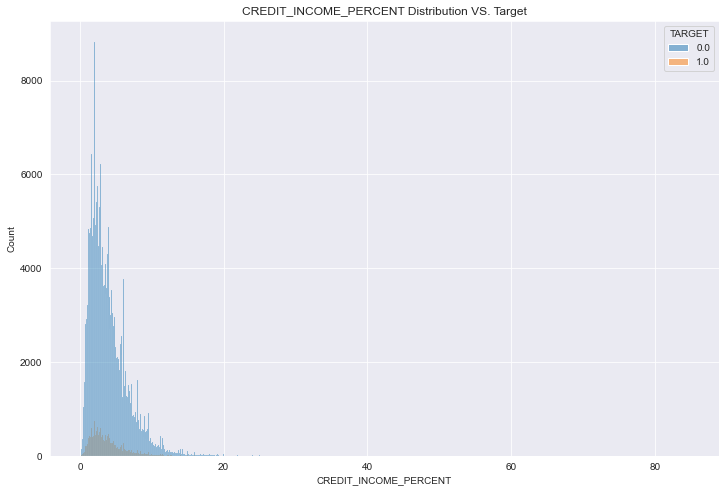

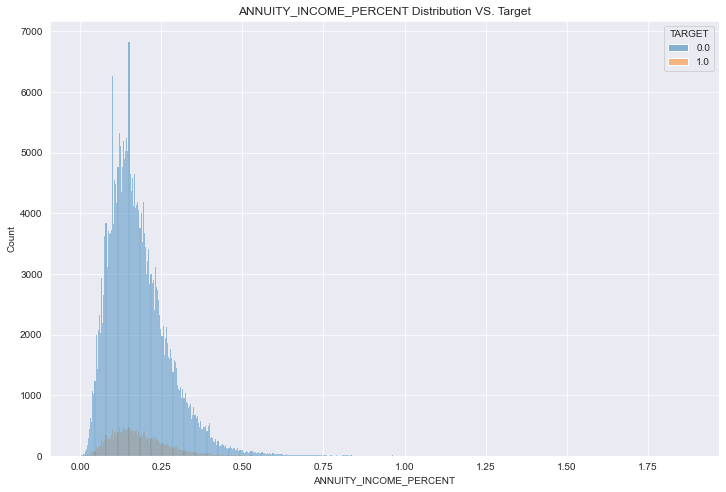

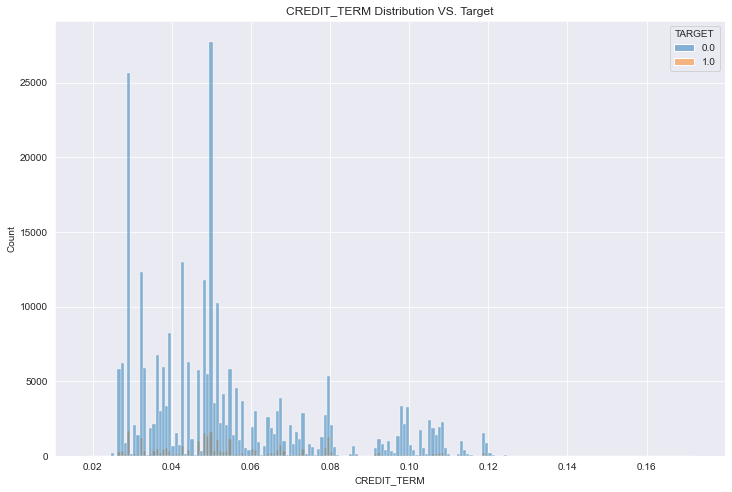

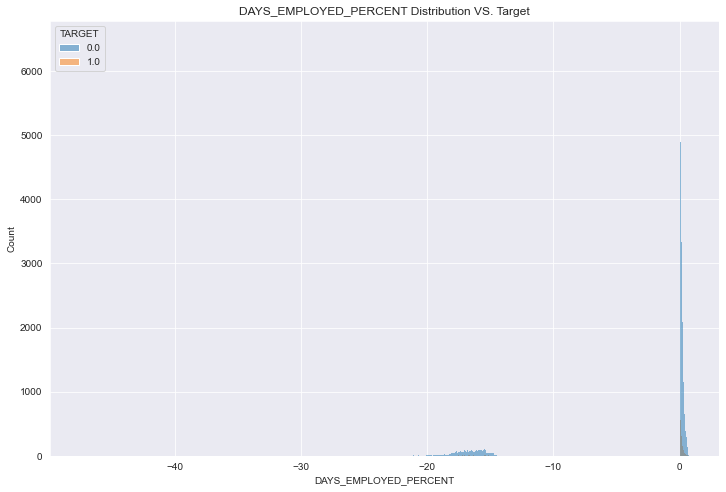

In [84]:
# Plot a list of the new features
for col in ['CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM','DAYS_EMPLOYED_PERCENT']:
    plt.figure(figsize=(12,8))
    sns.histplot(x= col,data=final_df,hue='TARGET')
    plt.title(f'{col} Distribution VS. Target')
    plt.show()